## Importing relevant libraries <a id="01"></a>

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('C:/Users/VIAN/Desktop/nullclass/ethnicity_detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/VIAN/Desktop/nullclass/ethnicity_detection\age_ethnicity.csv
C:/Users/VIAN/Desktop/nullclass/ethnicity_detection\age_ethnicity_prediction.ipynb


## Loading Dataset <a id="02"></a>

In [2]:
data = pd.read_csv('C:/Users/VIAN/Desktop/nullclass/ethnicity_detection/age_ethnicity.csv')

## Converting pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [3]:
print('Total rows: {}'.format(len(data)))
print('Total columns: {}'.format(len(data.columns)))

Total rows: 23705
Total columns: 5


## Distributions <a id="03"></a>

In [4]:
## normalizing pixels data
data['pixels'] = data['pixels'].apply(lambda x: x/255)

## calculating distributions
age_dist = data['age'].value_counts()
ethnicity_dist = data['ethnicity'].value_counts()

def ditribution_plot(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()

### Age Distribtion <a id="3.1"></a>

In [5]:
ditribution_plot(x=age_dist.index, y=age_dist.values, name='Age Distribution')

### Ethnicity Distribution <a id="3.2"></a>

In [6]:
ditribution_plot(x=ethnicity_dist.index, y=ethnicity_dist.values, name='Ethnicity Distribution')

In [7]:
X = np.array(data['pixels'].tolist())

## Converting pixels from 1D to 3D
X = X.reshape(X.shape[0],48,48,1)

### Sample Images <a id="3.4"></a>

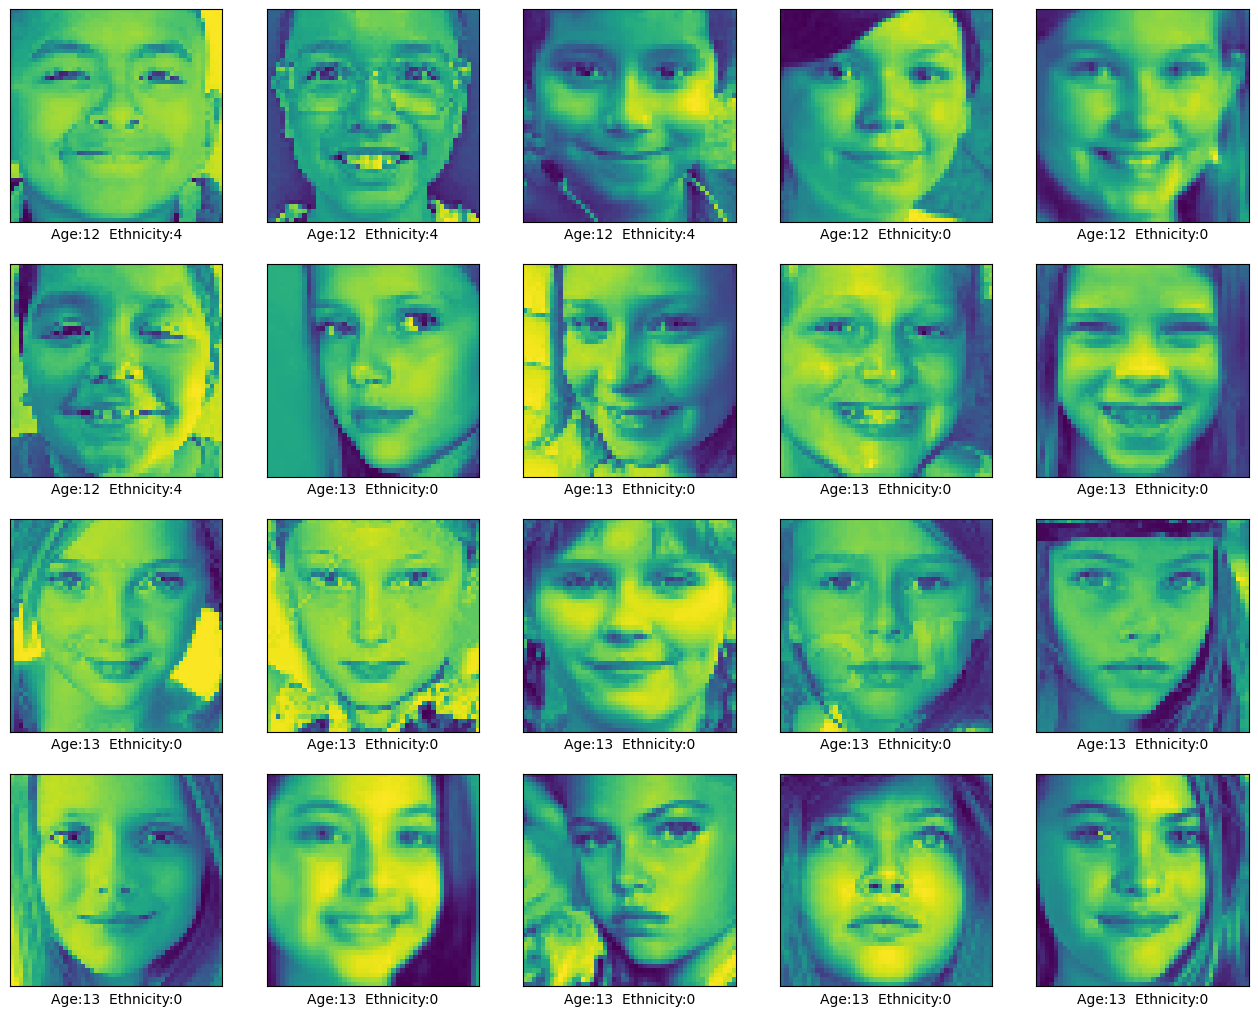

In [8]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(data['age'].iloc[i])+
        "  Ethnicity:"+str(data['ethnicity'].iloc[i])
    )
plt.show()

# Ethnicity Detection

### Split data into train/test <a id="5.1"></a>

In [9]:
y = data['ethnicity']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=37
)

### Build and train model <a id="5.2"></a>

In [10]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(5)
])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Stop training when validation accuracy reach 79%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.790):
            print("\nReached 79% val_accuracy so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()


model.summary()

c:\Users\VIAN\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning:

Argument `input_shape` is deprecated. Use `shape` instead.

c:\Users\VIAN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 428,805 (1.64 MB)

 Trainable params: 428,805 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    X_train, y_train, epochs=25, validation_split=0.05, batch_size=150, callbacks=[callback]
)

Epoch 1/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.4173 - loss: 1.4531 - val_accuracy: 0.6486 - val_loss: 1.0898
Epoch 2/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.5841 - loss: 1.1186 - val_accuracy: 0.6454 - val_loss: 0.9539
Epoch 3/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.6396 - loss: 1.0001 - val_accuracy: 0.7124 - val_loss: 0.8162
Epoch 4/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.6751 - loss: 0.9166 - val_accuracy: 0.6778 - val_loss: 0.9113
Epoch 5/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.6983 - loss: 0.8727 - val_accuracy: 0.7070 - val_loss: 0.8342
Epoch 6/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.7073 - loss: 0.8396 - val_accuracy: 0.7330 - val_loss: 0.8112
Epoch 7/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.7173 - loss: 0.8171 - val_accuracy: 0.7395 - val_loss: 0.7672
Epoch 8/25
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.7305 - loss: 0.7819 - val_acc

Epoch 1/25
129/130 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7986 - loss: 0.5702
Reached 79% val_accuracy so cancelling training!
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.7986 - loss: 0.5701 - val_accuracy: 0.8231 - val_loss: 0.5173


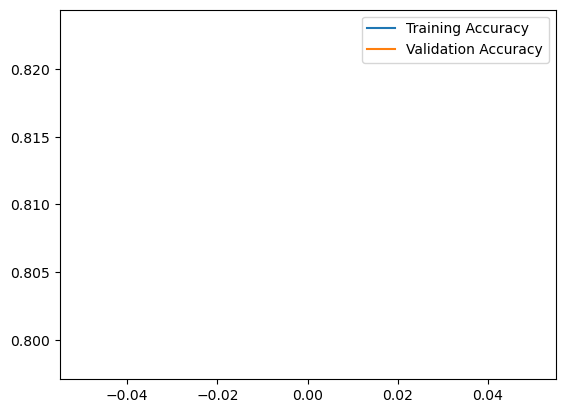

In [12]:
import matplotlib.pyplot as plt

# Get the history object
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, batch_size=128, callbacks=[callback])

# Extract the accuracy and val_accuracy values from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy and val_accuracy values
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.show()

Epoch 1/25
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8057 - loss: 0.5500
Reached 79% val_accuracy so cancelling training!
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.8058 - loss: 0.5500 - val_accuracy: 0.8248 - val_loss: 0.5121


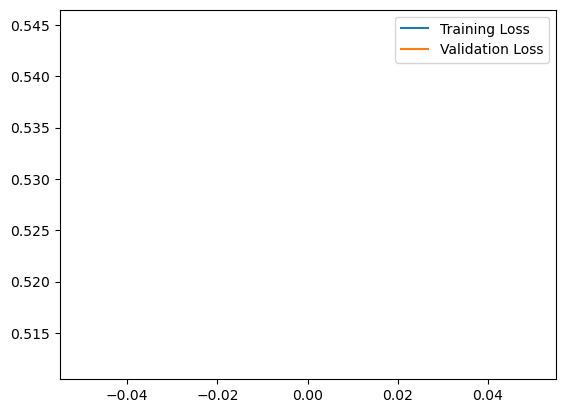

In [13]:
import matplotlib.pyplot as plt

# Get the history object
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, batch_size=128, callbacks=[callback])

# Extract the loss and val_loss values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss and val_loss values
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

### Evaluate training history <a id="5.3"></a>

In [14]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [21]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))
model.save('age_detect.keras.h5')

Test loss: 92.83903503417969
Test Accuracy: 7.147619724273682


# Age Detection

### Split data into train/test <a id="6.1"></a>

In [16]:
y = data['age']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=37
)

### Build and train model <a id="6.2"></a>

In [17]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(128, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='relu')
])

sgd = tf.keras.optimizers.SGD(momentum=0.9)

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


## Stop training when validation loss reach 110
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<110):
            print("\nReached 110 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()


model.summary()

c:\Users\VIAN\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning:

Argument `input_shape` is deprecated. Use `shape` instead.

c:\Users\VIAN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,001 (875.00 KB)

 Trainable params: 223,937 (874.75 KB)

 Non-trainable params: 64 (256.00 B)

In [18]:
history = model.fit(
    X_train, y_train, epochs=100, validation_split=0.1, batch_size=128, callbacks=[callback]
)

Epoch 1/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 23s 152ms/step - loss: 591.7947 - mae: 18.6829 - val_loss: 1338.9967 - val_mae: 30.7353
Epoch 2/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - loss: 273.7676 - mae: 12.6657 - val_loss: 1273.2501 - val_mae: 29.8715
Epoch 3/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - loss: 197.7836 - mae: 10.6936 - val_loss: 953.7056 - val_mae: 24.8598
Epoch 4/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - loss: 176.8346 - mae: 9.9970 - val_loss: 375.7654 - val_mae: 14.1711
Epoch 5/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - loss: 162.6200 - mae: 9.5355 - val_loss: 198.4787 - val_mae: 10.0772
Epoch 6/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - loss: 148.0912 - mae: 9.0186 - val_loss: 137.7997 - val_mae: 8.5613
Epoch 7/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - loss: 139.7859 - mae: 8.8760 - val_loss: 118.3169 - val_mae: 7.9462
Epoch 8/100
130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - loss: 136.4326 - mae: 8.6859 - val_loss: 138.7899 

### Evaluate training history <a id="6.3"></a> 

In [19]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [22]:
mse, mae = model.evaluate(X_test,y_test,verbose=0)
print('Test Mean squared error: {}'.format(mse))
print('Test Mean absolute error: {}'.format(mae))
model.save('ethnicity_detect.h5')

Test Mean squared error: 92.83903503417969
Test Mean absolute error: 7.147619724273682
